## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = merged_df['Mouse ID'].nunique()
print(f"There are {mouse_count} different mice in the study.")

#merged_df.count()

There are 249 different mice in the study.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# I'm not exactly sure what you mean...

dup_mice = merged_df.groupby(['Mouse ID', 'Timepoint'])
#dup_mice.count()

#dup_mice_df = merged_df.loc[:,['Mouse ID', 'Timepoint']]
#dup_mice_df

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#????

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
each_mouse_df = merged_df.drop_duplicates('Mouse ID')
each_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
each_mouse_df['Mouse ID'].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_data = merged_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df = pd.DataFrame({
    "Tumor Vol Mean": summary_data['Tumor Volume (mm3)'].mean(),
    "Tumor Vol Median": summary_data['Tumor Volume (mm3)'].median(),
    "Tumor Vol Variance": summary_data['Tumor Volume (mm3)'].var(),
    "Tumor Vol Std Dev": summary_data['Tumor Volume (mm3)'].std(),
    "Tumor Vol SEM": summary_data['Tumor Volume (mm3)'].sem()
})

# Assemble the resulting series into a single summary dataframe.
summary_df.round(3).head()

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = summary_data.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary_df.round(3).head()

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596

## Bar and Pie Charts

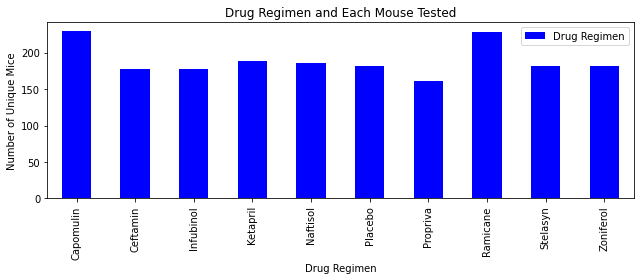

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PANDAS.

# Groupby drug regimen and use the unique mice count to create a new data frame
drugs = merged_df.groupby('Drug Regimen')
mice_to_drug = pd.DataFrame(drugs['Drug Regimen'].count())

# Plot the new data frame as a bar chart
mice_to_drug.plot(kind='bar', facecolor='blue', figsize=(9,4))
plt.title("Drug Regimen and Each Mouse Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
plt.tight_layout()

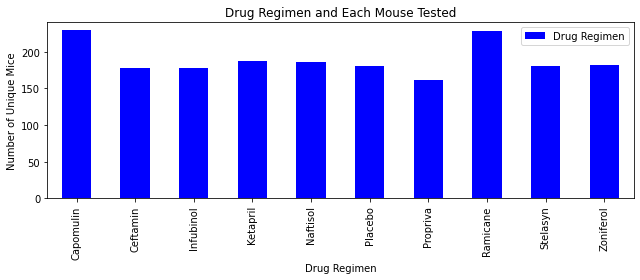

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PYPLOT.

# Groupby drug regimen and use the unique mice count to create a new data frame
drugs = merged_df.groupby('Drug Regimen')
mice_to_drug = pd.DataFrame(drugs['Drug Regimen'].count())

# Set axis and tick locations
x_axis = np.arange(len(mice_to_drug))
tick_locations = [value for value in x_axis]

# Plot bar chart and set x ticks
plt.figure(figsize=(9,4))
plt.bar(x_axis, mice_to_drug['Drug Regimen'], color='b', align="center", width=.5)
plt.xticks(tick_locations, list(mice_to_drug.index), rotation="vertical")

# Set x and y limits, title, and labels
plt.xlim(-.5, len(x_axis)-.5)
plt.ylim(0, 240)
plt.title("Drug Regimen and Each Mouse Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

legend_name = ['Drug Regimen']
plt.legend(legend_name, loc='best')
plt.tight_layout()

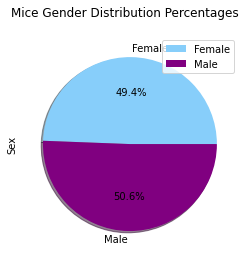

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS
genders = merged_df.groupby('Sex')

# Create a data frame with the grouped data
gender_df = pd.DataFrame(genders['Sex'].count())
#gender_df

# Use the pandas method to plot a pie chart
gender_df.plot(kind='pie', 
               subplots=True, 
               autopct='%1.1f%%', 
               title='Mice Gender Distribution Percentages', 
               colors=['lightskyblue', 'purple'], 
               shadow=True,
               legend=True)
plt.show()

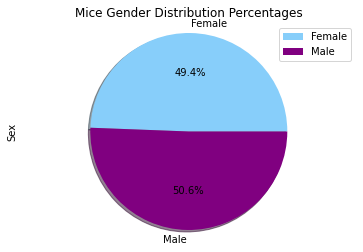

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using PYPLOT
genders = list(gender_df.index.values)
count = gender_df['Sex']
colors= ['lightskyblue', 'purple']
explode = (0.1, 0)
plt.figure()
plt.pie(count, labels=genders, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Mice Gender Distribution Percentages')
plt.axis('equal')
plt.ylabel('Sex')
plt.legend(loc='best')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Grab data from only the four regimens we will be using 
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_df = merged_df[merged_df['Drug Regimen'].isin(regimens)]

# Another way to do that:
#regimen_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") | 
                          #(merged_df["Drug Regimen"] == "Ramicane") | 
                          #(merged_df["Drug Regimen"] == "Infubinol") | 
                          #(merged_df["Drug Regimen"] == "Ceftamin"), :]

regimen_df = regimen_df.sort_values("Timepoint", ascending=False)
regimen_df = regimen_df.drop_duplicates(subset="Mouse ID", keep="first")
regimen_df.head()

# Another df with the index set as the drug regimen
#drug_reg_df = regimen_df.set_index('Drug Regimen')
#drug_reg_df

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in regimens:
    each_drug = regimen_df.loc[regimen_df['Drug Regimen'] == x,'Tumor Volume (mm3)'] 
    tumor_data.append(each_drug)
    quartiles = regimen_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
#print(tumor_data)
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

The lower quartile of Tumor Volume (mm3) is: 37.187743802499995
The upper quartile of Tumor Volume (mm3) is: 59.930261755000004
The interquartile range of Tumor Volume (mm3) is: 22.74251795250001
The the median of Tumor Volume (mm3) is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


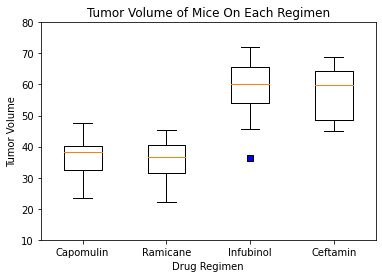

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_square = dict(markerfacecolor='b', marker='s')
fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Volume of Mice On Each Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')

ax1.set_ylim(10, 80)
ax1.boxplot(tumor_data, labels=regimens, flierprops=blue_square)
plt.show()

## Line and Scatter Plots

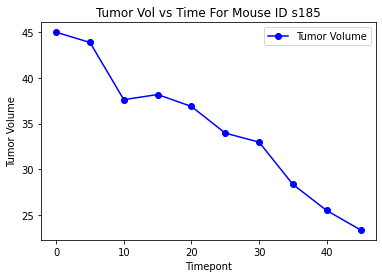

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_data = merged_df[(merged_df["Drug Regimen"] == "Capomulin") & (merged_df['Mouse ID'] == "s185")]
#cap_data.head()

#cap_timepoint = cap_data.groupby(['Timepoint'])
#cap_timepoint.head()

time_df = cap_data.set_index('Timepoint')
#time_df.head()

x_axis = list(time_df.index.values)
plt.figure()
tumor_vol, = plt.plot(x_axis, time_df['Tumor Volume (mm3)'], marker='o', color='blue', label='Tumor Volume')
plt.legend(handles=[tumor_vol], loc='best')
plt.title("Tumor Vol vs Time For Mouse ID s185")
plt.xlabel("Timepont")
plt.ylabel("Tumor Volume")
plt.show()

Text(0, 0.5, 'Tumor Vol')

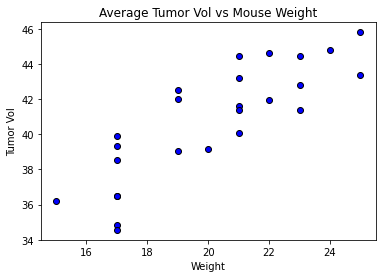

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen_weight = merged_df[(merged_df["Drug Regimen"] == "Capomulin")]
regimen_weight = regimen_weight[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
each_weight = regimen_weight.groupby(["Mouse ID", "Weight (g)"])

avg_vol_df = each_weight["Tumor Volume (mm3)"].mean().to_frame()
avg_vol_df = avg_vol_df.reset_index()
#avg_vol_df.head()

plt.scatter(avg_vol_df["Weight (g)"],
            avg_vol_df["Tumor Volume (mm3)"],
            marker = 'o',
            facecolors='blue',
            edgecolors='black')
plt.title('Average Tumor Vol vs Mouse Weight')
plt.xlabel('Weight')
plt.ylabel('Tumor Vol')


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = sts.pearsonr(avg_vol_df["Weight (g)"], avg_vol_df["Tumor Volume (mm3)"])
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

The correlation coefficient between both factors is 0.84
